In [33]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import numpy as np

## Exercitiul 1

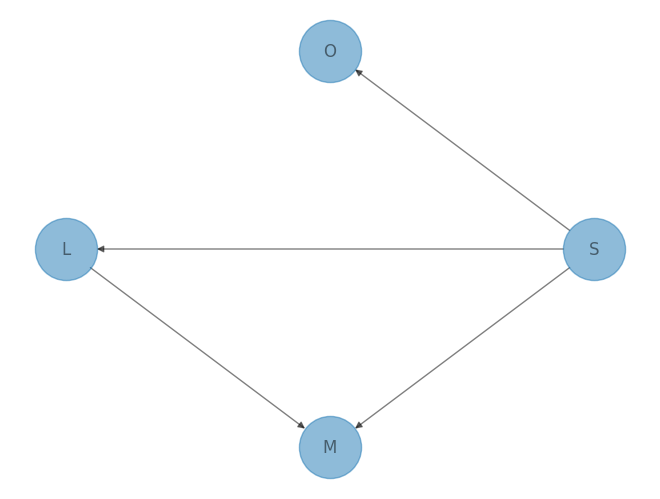

In [34]:
# Punctul a
email_model = DiscreteBayesianNetwork([('S', 'O'), ('S', 'L'), ('S', 'M'), ('L', 'M')])
pos = nx.circular_layout(email_model)
nx.draw(email_model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

In [35]:
# definim radacina S
CPD_S = TabularCPD(variable='S', variable_card=2, values=[[0.6], [0.4]])
print(CPD_S)

+------+-----+
| S(0) | 0.6 |
+------+-----+
| S(1) | 0.4 |
+------+-----+


In [36]:
# definim variabilele cu un parinte O, L
CPD_O = TabularCPD(variable='O', variable_card=2, 
                   values=[[0.9, 0.3],
                           [0.1, 0.7]],
                    evidence=['S'],
                    evidence_card=[2])

CPD_L = TabularCPD(variable='L', variable_card=2,
                   values=[[0.7, 0.2],
                           [0.3, 0.8]],
                    evidence=['S'],
                    evidence_card=[2])
print(CPD_O)
print(CPD_L)

+------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| O(0) | 0.9  | 0.3  |
+------+------+------+
| O(1) | 0.1  | 0.7  |
+------+------+------+
+------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| L(0) | 0.7  | 0.2  |
+------+------+------+
| L(1) | 0.3  | 0.8  |
+------+------+------+


In [37]:
# definim variabila cu doi parinti M
CPD_M = TabularCPD(variable='M', variable_card=2,
                   values=[[0.8, 0.4, 0.5, 0.1],
                           [0.2, 0.6, 0.5, 0.9]],
                    evidence=['S', 'L'],
                    evidence_card=[2, 2])
print(CPD_M)

+------+------+------+------+------+
| S    | S(0) | S(0) | S(1) | S(1) |
+------+------+------+------+------+
| L    | L(0) | L(1) | L(0) | L(1) |
+------+------+------+------+------+
| M(0) | 0.8  | 0.4  | 0.5  | 0.1  |
+------+------+------+------+------+
| M(1) | 0.2  | 0.6  | 0.5  | 0.9  |
+------+------+------+------+------+


In [38]:
# adaugam distributiile conditionale la model
email_model.add_cpds(CPD_S, CPD_O, CPD_L, CPD_M)
email_model.get_cpds()

[<TabularCPD representing P(S:2) at 0x21f5d8af410>,
 <TabularCPD representing P(O:2 | S:2) at 0x21f5d8af4a0>,
 <TabularCPD representing P(L:2 | S:2) at 0x21f5d8af530>,
 <TabularCPD representing P(M:2 | S:2, L:2) at 0x21f5d8af5c0>]

In [39]:
# verificam modelul
email_model.check_model()

True

In [40]:
# verificam independentele
email_model.local_independencies(['S', 'O', 'L', 'M'])

(O ⟂ M, L | S)
(L ⟂ O | S)
(M ⟂ O | S, L)

In [41]:
# Punctul b
from pgmpy.inference import VariableElimination
infer = VariableElimination(email_model)
posterior_p = infer.query(['S'], evidence={'O': 1, 'L': 1, 'M': 1})
print(posterior_p)

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0508 |
+------+----------+
| S(1) |   0.9492 |
+------+----------+


## Exercitiul 2

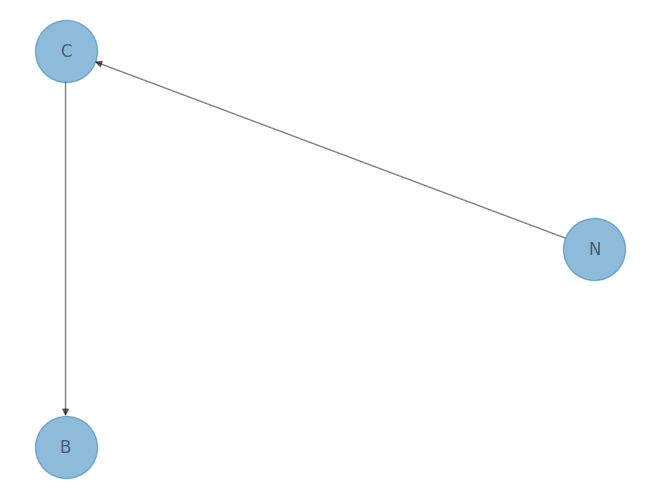

In [42]:
# N = numarul de pe zar
# C = culoarea bilei adaugate in urna
# B = bila extrasa

model = DiscreteBayesianNetwork([('N', 'C'), ('C', 'B')])

pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

In [43]:
CPD_N = TabularCPD(variable='N', variable_card=6, values=[[1/6], [1/6], [1/6], [1/6], [1/6], [1/6]])
print(CPD_N)

+------+----------+
| N(0) | 0.166667 |
+------+----------+
| N(1) | 0.166667 |
+------+----------+
| N(2) | 0.166667 |
+------+----------+
| N(3) | 0.166667 |
+------+----------+
| N(4) | 0.166667 |
+------+----------+
| N(5) | 0.166667 |
+------+----------+


In [44]:
# consideram 0=black, 1=red, 2=blue
CPD_C = TabularCPD(variable='C', variable_card=3,
                   values=[[0, 1, 1, 0, 1, 0],
                           [0, 0, 0, 0, 0, 1],
                           [1, 0, 0, 1, 0, 0]],
                   evidence=['N'],
                   evidence_card=[6])
print(CPD_C)

CPD_B = TabularCPD(variable='B', variable_card=3,
                   values=[[3/10, 2/10, 2/10],
                           [3/10, 4/10, 3/10],
                           [4/10, 4/10, 5/10]],
                   evidence=['C'],
                   evidence_card=[3])
print(CPD_B)

+------+------+------+------+------+------+------+
| N    | N(0) | N(1) | N(2) | N(3) | N(4) | N(5) |
+------+------+------+------+------+------+------+
| C(0) | 0.0  | 1.0  | 1.0  | 0.0  | 1.0  | 0.0  |
+------+------+------+------+------+------+------+
| C(1) | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 1.0  |
+------+------+------+------+------+------+------+
| C(2) | 1.0  | 0.0  | 0.0  | 1.0  | 0.0  | 0.0  |
+------+------+------+------+------+------+------+
+------+------+------+------+
| C    | C(0) | C(1) | C(2) |
+------+------+------+------+
| B(0) | 0.3  | 0.2  | 0.2  |
+------+------+------+------+
| B(1) | 0.3  | 0.4  | 0.3  |
+------+------+------+------+
| B(2) | 0.4  | 0.4  | 0.5  |
+------+------+------+------+


In [45]:
model.add_cpds(CPD_N, CPD_C, CPD_B)
model.get_cpds()

model.check_model()

True

In [46]:
n = np.random.randint(0, 6)
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
posterior_p = infer.query(["B"], evidence={"N": n})
print(posterior_p)

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.2000 |
+------+----------+
| B(1) |   0.4000 |
+------+----------+
| B(2) |   0.4000 |
+------+----------+


## Exercitiul 3

In [47]:
# Punctul a
nr_simulari = 10000
castiguri_p0 = 0
castiguri_p1 = 0

for i in range(nr_simulari):
    # aruncam moneda: 0=P0, 1=P1
    primul = np.random.choice([0, 1])
    if primul == 0:
        #da cu zarul
        n = np.random.randint(1, 7)
        # moneda masluita
        m = np.random.binomial(2 * n, 4/7)
        if n >= m:
            castiguri_p0 += 1
        else:
            castiguri_p1 += 1
    else:
        n = np.random.randint(1, 7)
        # moneda normala
        m = np.random.binomial(2 * n, 0.5)
        if n >= m:
            castiguri_p1 += 1
        else:
            castiguri_p0 += 1

prob_p0 = castiguri_p0 / nr_simulari
prob_p1 = castiguri_p1 / nr_simulari
print(f"Probabilitate de castig pt P0: {prob_p0:.3f}")
print(f"Probabilitate de castig pt P1: {prob_p1:.3f}")

Probabilitate de castig pt P0: 0.420
Probabilitate de castig pt P1: 0.580
